In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 유니코드에서  음수 부호설정

In [2]:
df_raw = pd.read_excel('./data/통합.xls')

In [4]:
df_raw

,Unnamed: 0,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유,날짜
0,0,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2143,1825,1858,-,2022-08-12
1,1,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1835,1901,-,2022-08-12
2,2,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,2158,1840,1873,1700,2022-08-12
3,3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,2076,1850,1898,-,2022-08-12
4,4,서울특별시,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,02-564-0187,N,2059,1859,1969,-,2022-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...
449,449,서울특별시,남선석유(주)구도일주유소 불암,서울 노원구 한글비석로 268 (중계동),S-OIL,02-932-6850,Y,-,1869,1929,-,2022-08-12
450,450,서울특별시,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,02-916-4334,Y,-,1898,1988,-,2022-08-12
451,451,서울특별시,노원주유소,서울 노원구 동일로 1008 (공릉동),GS칼텍스,02-949-5151,N,-,1929,1998,1600,2022-08-12
452,452,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,-,1985,2145,-,2022-08-12


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  454 non-null    int64         
 1   지역          454 non-null    object        
 2   상호          454 non-null    object        
 3   주소          454 non-null    object        
 4   상표          454 non-null    object        
 5   전화번호        454 non-null    object        
 6   셀프여부        454 non-null    object        
 7   고급휘발유       454 non-null    object        
 8   휘발유         454 non-null    object        
 9   경유          454 non-null    object        
 10  실내등유        454 non-null    object        
 11  날짜          454 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 42.7+ KB


In [6]:
df_raw.columns

Index(['Unnamed: 0', '지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유',
       '경유', '실내등유', '날짜'],
      dtype='object')

In [7]:
cols = ['상호', '휘발유', '상표', '셀프여부', '주소']
df_raw[cols]

,상호,휘발유,상표,셀프여부,주소
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동)
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동)
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동)
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동)
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동)
...,...,...,...,...,...
449,남선석유(주)구도일주유소 불암,1869,S-OIL,Y,서울 노원구 한글비석로 268 (중계동)
450,신성주유소,1898,S-OIL,Y,서울 노원구 월계로 328 (월계동)
451,노원주유소,1929,GS칼텍스,N,서울 노원구 동일로 1008 (공릉동)
452,하계삼호주유소,1985,GS칼텍스,N,서울 노원구 공릉로 294 (하계동)


In [8]:
df = df_raw[cols]

In [9]:
df

,상호,휘발유,상표,셀프여부,주소
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동)
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동)
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동)
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동)
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동)
...,...,...,...,...,...
449,남선석유(주)구도일주유소 불암,1869,S-OIL,Y,서울 노원구 한글비석로 268 (중계동)
450,신성주유소,1898,S-OIL,Y,서울 노원구 월계로 328 (월계동)
451,노원주유소,1929,GS칼텍스,N,서울 노원구 동일로 1008 (공릉동)
452,하계삼호주유소,1985,GS칼텍스,N,서울 노원구 공릉로 294 (하계동)


In [12]:
df['구'] = [i.split(' ')[1] for i in df['주소']]

C:\Users\user\AppData\Local\Temp\ipykernel_8988\672249893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구'] = [i.split(' ')[1] for i in df['주소']]


In [13]:
df

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구
...,...,...,...,...,...,...
449,남선석유(주)구도일주유소 불암,1869,S-OIL,Y,서울 노원구 한글비석로 268 (중계동),노원구
450,신성주유소,1898,S-OIL,Y,서울 노원구 월계로 328 (월계동),노원구
451,노원주유소,1929,GS칼텍스,N,서울 노원구 동일로 1008 (공릉동),노원구
452,하계삼호주유소,1985,GS칼텍스,N,서울 노원구 공릉로 294 (하계동),노원구


In [14]:
df.dtypes

상호      object
휘발유     object
상표      object
셀프여부    object
주소      object
구       object
dtype: object

In [17]:
df['휘발유'].astype('int')

ValueError: invalid literal for int() with base 10: '-'

In [18]:
df['휘발유'].replace('-', '')

0      1825
1      1835
2      1840
3      1850
4      1859
       ... 
449    1869
450    1898
451    1929
452    1985
453    1985
Name: 휘발유, Length: 454, dtype: object

In [19]:
df['휘발유'].replace('-', '').astype('int')

ValueError: invalid literal for int() with base 10: ''

In [20]:
df[df['휘발유'] == '-']

,상호,휘발유,상표,셀프여부,주소,구
134,지에스칼텍스(주)내곡주유소,-,GS칼텍스,N,서울 서초구 헌릉로 210,서초구
269,한일주유소,-,SK에너지,N,서울 영등포구 도림로 486 (문래동3가),영등포구
299,삼융주유소,-,SK에너지,N,서울 은평구 수색로 299 (수색동),은평구
308,현대오일뱅크㈜직영 재동주유소,-,현대오일뱅크,N,서울 종로구 율곡로 58 (경운동),종로구
319,지에스칼텍스(주)직영 역전점,-,GS칼텍스,N,서울 중구 퇴계로 15,중구
406,대성산업(주)구의주유소,-,GS칼텍스,N,서울 광진구 광나루로 570 (구의동),광진구
407,지에스칼텍스 (주)구의스타주유소,-,GS칼텍스,N,서울 광진구 자양로 103,광진구


In [21]:
df[df['휘발유'] != '-']

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구
...,...,...,...,...,...,...
449,남선석유(주)구도일주유소 불암,1869,S-OIL,Y,서울 노원구 한글비석로 268 (중계동),노원구
450,신성주유소,1898,S-OIL,Y,서울 노원구 월계로 328 (월계동),노원구
451,노원주유소,1929,GS칼텍스,N,서울 노원구 동일로 1008 (공릉동),노원구
452,하계삼호주유소,1985,GS칼텍스,N,서울 노원구 공릉로 294 (하계동),노원구


In [22]:
df = df[df['휘발유'] != '-']

In [23]:
df['휘발유'].astype('int')

0      1825
1      1835
2      1840
3      1850
4      1859
       ... 
449    1869
450    1898
451    1929
452    1985
453    1985
Name: 휘발유, Length: 447, dtype: int32

In [25]:
df['휘발유'] = df['휘발유'].astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_8988\1364879168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['휘발유'] = df['휘발유'].astype('int')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 453
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      447 non-null    object
 1   휘발유     447 non-null    int32 
 2   상표      447 non-null    object
 3   셀프여부    447 non-null    object
 4   주소      447 non-null    object
 5   구       447 non-null    object
dtypes: int32(1), object(5)
memory usage: 22.7+ KB


In [27]:
df.describe()

,휘발유
count,447.000000
mean,1867.747204
std,165.863189
min,1727.000000
25%,1777.000000
50%,1807.000000
75%,1879.500000
max,2765.000000


In [28]:
df[df['휘발유'] == 1727]

,상호,휘발유,상표,셀프여부,주소,구
345,이케이에너지(주) 강서주유소,1727,현대오일뱅크,Y,서울 강서구 화곡로 273 (화곡동),강서구
346,화곡역주유소,1727,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구
347,뉴신정주유소,1727,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구
348,목화주유소,1727,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구
349,강서오곡셀프주유소,1727,SK에너지,Y,서울 강서구 벌말로 254 (오곡동),강서구


In [29]:
df[df['휘발유'] == 2765]

,상호,휘발유,상표,셀프여부,주소,구
282,서계주유소,2765,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구


In [31]:
df[df['휘발유'] >= 2000]

,상호,휘발유,상표,셀프여부,주소,구
21,지에스칼텍스㈜ 은마주유소,2004,GS칼텍스,N,서울 강남구 영동대로 235,강남구
22,삼성동주유소,2074,현대오일뱅크,N,서울 강남구 테헤란로 619 (삼성동),강남구
23,지에스칼텍스㈜ 삼성로주유소,2090,GS칼텍스,Y,서울 강남구 삼성로 563 (삼성동),강남구
24,(주)소모에너지 쎈트럴주유소,2090,GS칼텍스,N,서울 강남구 삼성로 335,강남구
25,대성석유(주)동호주유소,2099,GS칼텍스,N,서울 강남구 봉은사로113길 51,강남구
26,지에스칼텍스(주)학여울주유소,2146,GS칼텍스,N,서울 강남구 남부순환로 3170 (일원2동),강남구
27,제이제이주유소,2198,현대오일뱅크,N,서울 강남구 언주로 716,강남구
28,명품주유소,2296,S-OIL,N,서울 강남구 도곡로 249 (역삼동),강남구
29,㈜새서울석유 새서울주유소,2297,현대오일뱅크,N,서울 강남구 압구정로 154,강남구
30,대청주유소,2299,SK에너지,N,서울 강남구 개포로 654 (일원동),강남구


In [32]:
df[df['휘발유'] >= 2000]['구'].value_counts()

강남구     13
용산구      9
성동구      5
영등포구     5
중구       5
종로구      4
서초구      3
구로구      3
마포구      1
송파구      1
강동구      1
강서구      1
Name: 구, dtype: int64

In [33]:
df[df['휘발유'] <= 1800]['구'].value_counts()

영등포구    21
양천구     21
성북구     18
강서구     18
동대문구    15
구로구     13
도봉구     13
송파구     11
강북구     11
광진구     10
금천구     10
중랑구      8
성동구      7
서대문구     7
서초구      6
관악구      6
동작구      6
노원구      6
은평구      5
마포구      2
강동구      1
중구       1
Name: 구, dtype: int64

In [36]:
df[(df['휘발유'] <= 1800) & (df['구']=='동작구')]

,상호,휘발유,상표,셀프여부,주소,구
68,창원이엔지주유소,1773,현대오일뱅크,N,서울 동작구 사당로 59 (상도동),동작구
69,현대오일뱅크(주)직영 사당셀프주유소,1782,현대오일뱅크,Y,서울 동작구 동작대로 73 (사당동),동작구
70,현대오일뱅크㈜직영 흑석동셀프주유소,1782,현대오일뱅크,Y,서울 동작구 현충로 101 (흑석동),동작구
71,현대오일뱅크(주)직영 동작주유소,1792,현대오일뱅크,N,서울 동작구 상도로 403 (상도동),동작구
72,현대오일뱅크㈜직영 신대방셀프주유소,1792,현대오일뱅크,Y,서울 동작구 시흥대로 616 (신대방동),동작구
73,지에스칼텍스(주) 대방주유소,1792,GS칼텍스,N,서울 동작구 여의대방로 214,동작구


In [37]:
df.head()

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구


In [38]:
df['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [40]:
for i in df['구'].unique():
    display(df[(df['휘발유'] <= 1800) & (df['구']==i)])

,상호,휘발유,상표,셀프여부,주소,구


,상호,휘발유,상표,셀프여부,주소,구
34,(주)자연에너지 햇살주유소,1755,현대오일뱅크,Y,서울 도봉구 방학로 142 (방학동),도봉구
35,도봉제일주유소(주)송만에너지,1755,현대오일뱅크,N,서울 도봉구 도봉로 783 (도봉동),도봉구
36,삼미북부셀프주유소,1775,SK에너지,Y,서울 도봉구 도봉로 437 (쌍문동),도봉구
37,극동유화(주) 대안주유소,1775,S-OIL,Y,서울 도봉구 마들로 574 (창동),도봉구
38,대성산업(주)신창주유소,1775,GS칼텍스,Y,서울 도봉구 덕릉로 267 (창동),도봉구
39,한이에너지(주) 쌍문주유소,1775,S-OIL,Y,서울 도봉구 도봉로 547 (쌍문동),도봉구
40,(주)헨지스에너지 구도일주유소 도봉,1775,S-OIL,Y,서울 도봉구 도봉로 706 (방학동),도봉구
41,현대오일뱅크㈜직영 도봉현대셀프주유소,1779,현대오일뱅크,Y,서울 도봉구 도봉로 941 (도봉동),도봉구
42,동일석유(주) 창동주유소,1787,SK에너지,Y,서울 도봉구 도봉로 434 (창동),도봉구
43,현대오일뱅크㈜직영 영신주유소,1797,현대오일뱅크,N,서울 도봉구 방학로 151,도봉구


,상호,휘발유,상표,셀프여부,주소,구
50,동서울고속주유소,1745,SK에너지,Y,서울 동대문구 한천로 414,동대문구
51,풍한주유소,1745,SK에너지,N,서울 동대문구 안암로 168,동대문구
52,삼영주유소,1747,SK에너지,N,서울 동대문구 답십리로 258 (장안동),동대문구
53,(주)자연에너지 국민주유소,1749,현대오일뱅크,N,서울 동대문구 답십리로 223 (답십리동),동대문구
54,대성산업㈜청량리주유소,1755,GS칼텍스,Y,서울 동대문구 왕산로 289 (청량리동),동대문구
55,대성산업(주)동마장주유소,1755,GS칼텍스,Y,서울 동대문구 고산자로 405 (용두동),동대문구
56,(주)파랑에너지,1755,GS칼텍스,Y,서울 동대문구 망우로 126,동대문구
57,열린주유소,1757,S-OIL,N,서울 동대문구 한천로 263 (휘경동),동대문구
58,배봉로주유소,1775,현대오일뱅크,Y,서울 동대문구 서울시립대로 108,동대문구
59,재정주유소,1779,현대오일뱅크,Y,서울 동대문구 전농로 121 (전농동),동대문구


,상호,휘발유,상표,셀프여부,주소,구
68,창원이엔지주유소,1773,현대오일뱅크,N,서울 동작구 사당로 59 (상도동),동작구
69,현대오일뱅크(주)직영 사당셀프주유소,1782,현대오일뱅크,Y,서울 동작구 동작대로 73 (사당동),동작구
70,현대오일뱅크㈜직영 흑석동셀프주유소,1782,현대오일뱅크,Y,서울 동작구 현충로 101 (흑석동),동작구
71,현대오일뱅크(주)직영 동작주유소,1792,현대오일뱅크,N,서울 동작구 상도로 403 (상도동),동작구
72,현대오일뱅크㈜직영 신대방셀프주유소,1792,현대오일뱅크,Y,서울 동작구 시흥대로 616 (신대방동),동작구
73,지에스칼텍스(주) 대방주유소,1792,GS칼텍스,N,서울 동작구 여의대방로 214,동작구


,상호,휘발유,상표,셀프여부,주소,구
77,청원주유소,1798,현대오일뱅크,Y,서울 마포구 월드컵북로 113 (성산동),마포구
78,성산대교셀프주유소,1798,현대오일뱅크,Y,서울 마포구 성산로 144,마포구


,상호,휘발유,상표,셀프여부,주소,구
89,(주)창원이엔지 홍제지점,1759,현대오일뱅크,N,서울 서대문구 통일로 455 (홍제동),서대문구
90,현대오일뱅크㈜직영 독립문주유소,1786,현대오일뱅크,N,서울 서대문구 통일로 384 (홍제동),서대문구
91,현대오일뱅크(주)직영 연세주유소,1792,현대오일뱅크,Y,서울 서대문구 연희로 184,서대문구
92,(주)가재울뉴타운주유소,1793,현대오일뱅크,Y,서울 서대문구 모래내로 205,서대문구
93,중앙에너비스 동교지점,1795,SK에너지,Y,서울 서대문구 연희로 12 (창천동),서대문구
94,구도일주유소 두꺼비,1798,S-OIL,Y,서울 서대문구 성산로 312,서대문구
95,남정주유소,1798,GS칼텍스,N,서울 서대문구 모래내로 243 (남가좌동),서대문구


,상호,휘발유,상표,셀프여부,주소,구
104,만남의광장주유소,1738,알뜰(ex),Y,서울 서초구 양재대로12길 73-71,서초구
105,현대오일뱅크㈜직영 사평로주유소,1777,현대오일뱅크,N,서울 서초구 사평대로 350 (서초동),서초구
106,(주)대농석유 남태령주유소,1785,SK에너지,Y,서울 서초구 과천대로 838 (방배동),서초구
107,현대오일뱅크(주)직영 팔레스주유소,1785,현대오일뱅크,N,서울 서초구 사평대로 136 (반포동),서초구
108,현대오일뱅크(주)직영 방배현대주유소,1792,현대오일뱅크,N,서울 서초구 동작대로 182 (방배동),서초구
109,현대오일뱅크(주)직영 서초제일주유소,1797,현대오일뱅크,N,서울 서초구 사임당로 116 (서초동),서초구


,상호,휘발유,상표,셀프여부,주소,구
135,(주)서울에너지 직영,1736,S-OIL,Y,서울 성동구 천호대로 324 (용답동),성동구
136,정호주유소,1745,자가상표,N,서울 성동구 고산자로 307 (마장동),성동구
137,아이콘주유소,1768,S-OIL,N,서울 성동구 고산자로 273 (도선동),성동구
138,삼우주유소,1779,SK에너지,N,서울 성동구 천호대로 392,성동구
139,현대오일뱅크(주) 성동셀프주유소,1779,현대오일뱅크,Y,서울 성동구 마장로 311 (마장동),성동구
140,SK에너지(주) 군자동주유소,1779,SK에너지,N,서울 성동구 천호대로 446 (용답동),성동구
141,KLP제2주유소,1796,현대오일뱅크,Y,서울 성동구 동일로 249 (송정동),성동구


,상호,휘발유,상표,셀프여부,주소,구
150,원천주유소,1743,알뜰주유소,N,서울 성북구 돌곶이로 142 (장위동),성북구
151,이케이에너지(주) 강산제2주유소,1745,현대오일뱅크,Y,서울 성북구 보국문로 52,성북구
152,중앙에너비스 종암지점,1745,SK에너지,Y,서울 성북구 종암로 58,성북구
153,(주)삼표에너지 정릉주유소,1745,GS칼텍스,Y,서울 성북구 보국문로 35 (정릉동),성북구
154,장위주유소,1745,S-OIL,Y,서울 성북구 화랑로 110 (하월곡동),성북구
155,(주)성북주유소,1755,현대오일뱅크,Y,서울 성북구 보문로 142,성북구
156,현대오일뱅크㈜직영 장삼주유소,1755,현대오일뱅크,Y,서울 성북구 한천로 612 (장위동),성북구
157,현대오일뱅크㈜직영 고대셀프주유소,1755,현대오일뱅크,Y,서울 성북구 종암로 12 (종암동),성북구
158,이케이에너지㈜ 강산주유소,1755,GS칼텍스,Y,서울 성북구 보문로 27 (보문동7가),성북구
159,SK에너지(주) 드림랜드주유소,1756,SK에너지,N,서울 성북구 월계로 128 (장위동),성북구


,상호,휘발유,상표,셀프여부,주소,구
173,지에스이앤알 직영 송파제일주유소,1780,현대오일뱅크,Y,서울 송파구 삼학사로 50 (석촌동),송파구
174,한강에너지(주)퍼스트주유소,1781,SK에너지,Y,서울 송파구 삼학사로 22 (석촌동),송파구
175,현대오일뱅크㈜직영 잠실셀프주유소,1783,현대오일뱅크,Y,서울 송파구 송파대로 397 (석촌동),송파구
176,삼화주유소,1787,GS칼텍스,Y,서울 송파구 백제고분로 125,송파구
177,상아주유소,1787,S-OIL,Y,서울 송파구 거마로 82,송파구
178,위례제일주유소,1787,S-OIL,Y,서울 송파구 위례서로 260,송파구
179,위례드림주유소,1787,S-OIL,Y,서울시 송파구 위례중앙로 10,송파구
180,남성대주유소,1787,SK에너지,Y,서울 송파구 송파대로 52 (장지동),송파구
181,(주)뉴명성산업 남성주유소,1799,현대오일뱅크,N,서울 송파구 백제고분로 474 (방이동),송파구
182,(주)삼표에너지 아시아주유소,1799,GS칼텍스,Y,서울 송파구 도곡로 438 (잠실동),송파구


,상호,휘발유,상표,셀프여부,주소,구
203,가로공원주유소,1749,SK에너지,N,서울 양천구 가로공원로 165 (신월동),양천구
204,현대주유소,1749,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구
205,양천구주유소,1749,알뜰주유소,Y,서울 양천구 국회대로 275 (목동),양천구
206,형산석유(주)원주유소,1749,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구
207,개나리Self주유소,1749,SK에너지,Y,서울 양천구 남부순환로 442 (신월동),양천구
208,지에스이앤알 직영 서울주유소,1753,GS칼텍스,N,서울 양천구 신정로 236 (신정동),양천구
209,신월주유소,1754,GS칼텍스,Y,서울 양천구 신월로 193 (신월동),양천구
210,(주)타이거오일 신정주유소,1754,SK에너지,Y,서울 양천구 중앙로 226 (신정동),양천구
211,삼미상사(주)신월IC셀프주유소,1754,SK에너지,Y,서울 양천구 중앙로 331 (신월동),양천구
212,현대오일뱅크(주)직영 남부순환셀프주유소,1762,현대오일뱅크,Y,서울 양천구 남부순환로 553 (신월동),양천구


,상호,휘발유,상표,셀프여부,주소,구
228,재건에너지 재정제2주유소 고속셀프지점,1799,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구


,상호,휘발유,상표,셀프여부,주소,구
242,도림주유소,1747,알뜰주유소,Y,서울 영등포구 도림로 343 (도림동),영등포구
243,영등포제일셀프주유소,1747,현대오일뱅크,Y,서울 영등포구 가마산로 379,영등포구
244,성락주유소,1747,S-OIL,Y,서울 영등포구 가마산로 414 (신길동),영등포구
245,남서울고속주유소,1747,SK에너지,Y,서울 영등포구 가마산로 367 (대림동),영등포구
246,영등포현대셀프주유소,1747,현대오일뱅크,Y,서울 영등포구 경인로 822 (영등포동),영등포구
247,(주)대청에너지 대청주유소,1747,GS칼텍스,Y,서울 영등포구 가마산로 328 (대림동),영등포구
248,(주)강서오일,1747,현대오일뱅크,N,서울 영등포구 도신로 151,영등포구
249,행촌주유소,1747,SK에너지,N,서울 영등포구 도신로 130 (신길동),영등포구
250,(주)MS에너지,1757,현대오일뱅크,N,서울 영등포구 대림로 230,영등포구
251,㈜지에스이앤알 모드니주유소,1757,GS칼텍스,N,서울 영등포구 경인로 789,영등포구


,상호,휘발유,상표,셀프여부,주소,구


,상호,휘발유,상표,셀프여부,주소,구
283,불광주유소,1757,현대오일뱅크,Y,서울 은평구 연서로 314 (불광동),은평구
284,대성산업㈜ 대성주유소,1759,GS칼텍스,Y,서울 은평구 통일로 642,은평구
285,현대오일뱅크㈜직영 은평드림주유소,1778,현대오일뱅크,N,서울 은평구 통일로 1151 (진관동),은평구
286,타이거주유소,1794,SK에너지,Y,서울 은평구 수색로 188 (증산동),은평구
287,다회주유소,1799,S-OIL,Y,서울 은평구 증산로 441 (신사동),은평구


,상호,휘발유,상표,셀프여부,주소,구


,상호,휘발유,상표,셀프여부,주소,구
309,다산주유소,1789,S-OIL,Y,서울 중구 다산로 233,중구


,상호,휘발유,상표,셀프여부,주소,구
320,우림주유소,1737,GS칼텍스,Y,서울특별시 중랑구 용마산로 487 (망우제3동),중랑구
321,대양주유소,1737,GS칼텍스,Y,서울 중랑구 봉우재로 105 (상봉동),중랑구
322,오천만주유소,1737,S-OIL,Y,서울 중랑구 동일로 547 (면목동),중랑구
323,구도일주유소 동천,1739,S-OIL,Y,서울 중랑구 동일로 654 (면목동),중랑구
324,(주)자연에너지 대창주유소,1739,현대오일뱅크,N,서울 중랑구 동일로 636 (면목동),중랑구
325,면목SELF주유소,1739,SK에너지,Y,서울 중랑구 동일로 627 (면목동),중랑구
326,대원주유소,1749,GS칼텍스,Y,서울 중랑구 동일로 600,중랑구
327,(주)태영 구도일주유소 한인,1757,S-OIL,Y,서울 중랑구 망우로 170 (상봉동),중랑구


,상호,휘발유,상표,셀프여부,주소,구
333,씨앤에스에너지㈜ 미아셀프주유소,1755,S-OIL,Y,서울 강북구 도봉로 200 (미아동),강북구
334,수유동주유소,1755,GS칼텍스,Y,서울 강북구 도봉로 395 (수유동),강북구
335,(주)석산에너지,1755,현대오일뱅크,Y,서울 강북구 삼양로 316 (수유동),강북구
336,SK에너지(주) 매일주유소,1755,SK에너지,Y,서울 강북구 삼양로 217 (미아동),강북구
337,북서울고속주유소,1755,SK에너지,Y,서울 강북구 삼양로 410 (수유동),강북구
338,(주)서울에너지 시민주유소,1755,현대오일뱅크,N,서울 강북구 인수봉로 185 (수유동),강북구
339,㈜지에스이앤알 미아주유소,1775,GS칼텍스,Y,서울 강북구 도봉로 122 (미아동),강북구
340,덕릉로주유소,1775,S-OIL,Y,서울 강북구 덕릉로 158 (번동),강북구
341,현대오일뱅크(주)직영 번동셀프주유소,1777,현대오일뱅크,Y,서울 강북구 한천로 963 (번동),강북구
342,대성석유(주)신광주유소,1777,GS칼텍스,N,서울 강북구 삼양로 484,강북구


,상호,휘발유,상표,셀프여부,주소,구
345,이케이에너지(주) 강서주유소,1727,현대오일뱅크,Y,서울 강서구 화곡로 273 (화곡동),강서구
346,화곡역주유소,1727,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구
347,뉴신정주유소,1727,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구
348,목화주유소,1727,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구
349,강서오곡셀프주유소,1727,SK에너지,Y,서울 강서구 벌말로 254 (오곡동),강서구
350,유턴주유소,1747,알뜰주유소,Y,서울 강서구 남부순환로 57,강서구
351,하이웨이주유소,1749,S-OIL,Y,서울특별시 강서구 공항대로 432(화곡동),강서구
352,방화주유소,1763,SK에너지,Y,서울 강서구 방화동로 58-2 (방화동),강서구
353,KH에너지(주)직영 KH외발산주유소,1765,SK에너지,Y,서울 강서구 방화대로 30,강서구
354,행촌에너지 공항주유소,1765,현대오일뱅크,Y,서울 강서구 개화동로 420 (개화동),강서구


,상호,휘발유,상표,셀프여부,주소,구
378,(주)연우에너지 신관주유소,1777,알뜰주유소,Y,서울 관악구 신림로 290 (신림동),관악구
379,SK에너지(주)직영 대공원주유소,1779,SK에너지,N,서울 관악구 과천대로 921 (남현동),관악구
380,서일석유(주)락성주유소,1779,GS칼텍스,Y,서울 관악구 남부순환로 1920 (봉천동),관악구
381,현대오일뱅크(주)직영 관악셀프주유소,1787,현대오일뱅크,Y,서울 관악구 남부순환로 1520 (신림동),관악구
382,SK에너지(주) 신봉천,1789,SK에너지,N,서울 관악구 남부순환로 1880 (봉천동),관악구
383,현대오일뱅크(주)직영 문성골주유소,1792,현대오일뱅크,N,서울 관악구 문성로 97 (신림동),관악구


,상호,휘발유,상표,셀프여부,주소,구
392,태양주유소,1736,현대오일뱅크,N,서울 광진구 동일로 345 (중곡동),광진구
393,(주)창원CW,1736,현대오일뱅크,Y,서울 광진구 광나루로 460 (화양동),광진구
394,현대오일뱅크(주)직영 능동주유소,1736,현대오일뱅크,Y,서울 광진구 천호대로 584 (능동),광진구
395,정해네트웍스(주)일진주유소,1745,S-OIL,Y,서울 광진구 동일로 413 (중곡동),광진구
396,현대오일뱅크(주)직영 중곡현대주유소,1746,현대오일뱅크,Y,서울 광진구 동일로 435 (중곡동),광진구
397,현대오일뱅크(주) 중원셀프주유소,1746,현대오일뱅크,Y,서울 광진구 동일로 398 (중곡동),광진구
398,용마주유소,1765,GS칼텍스,N,서울 광진구 용마산로 68 (중곡동),광진구
399,대원주유소,1765,S-OIL,N,서울 광진구 용마산로 122 (중곡동),광진구
400,삼호주유소,1787,S-OIL,Y,서울 광진구 천호대로 809 (광장동),광진구
401,현대오일뱅크㈜직영 장호셀프주유소,1797,현대오일뱅크,Y,서울 광진구 자양로37 (자양동),광진구


,상호,휘발유,상표,셀프여부,주소,구
408,서서울고속주유소,1739,SK에너지,Y,서울 구로구 경인로 150 (오류동),구로구
409,SK에너지(주)직영 개봉동주유소,1749,SK에너지,N,서울 구로구 경인로 290 (개봉동),구로구
410,처음처럼주유소,1749,S-OIL,N,서울 구로구 오리로 1299 (궁동),구로구
411,서울석유(주)풀페이주유소,1769,SK에너지,N,서울 구로구 경인로 41 (온수동),구로구
412,현대오일뱅크㈜직영 신오류주유소,1772,현대오일뱅크,N,서울 구로구 경인로 161 (오류동),구로구
413,신성주유소,1777,현대오일뱅크,Y,서울 구로구 구로동로 187 (구로제2동),구로구
414,(주)한미석유구로그린주유소,1777,GS칼텍스,Y,서울 구로구 구로중앙로 76 (구로동),구로구
415,구인주유소,1777,SK에너지,N,서울 구로구 경인로 558 (구로동),구로구
416,대성산업(주)디큐브주유소,1777,GS칼텍스,N,서울 구로구 경인로 650 (신도림동),구로구
417,SK구로주유소,1778,SK에너지,N,서울 구로구 구일로 94 (구로동),구로구


,상호,휘발유,상표,셀프여부,주소,구
428,구광주유소,1755,S-OIL,N,서울 금천구 서부샛길 674 (가산동),금천구
429,(주)백운주유소,1777,알뜰주유소,Y,서울 금천구 시흥대로 282 (독산동),금천구
430,SK에너지(주) 박미주유소,1785,SK에너지,Y,서울 금천구 시흥대로 39-7 (시흥동),금천구
431,대득에너지(금천셀프주유소),1785,GS칼텍스,Y,서울 금천구 시흥대로 81 (시흥동),금천구
432,현대오일뱅크(주)직영 금천현대셀프주유소,1786,현대오일뱅크,Y,서울 금천구 독산로 147 (시흥동),금천구
433,(주)화동유업 화동주유소,1787,SK에너지,Y,서울 금천구 시흥대로 484,금천구
434,현대오일뱅크㈜직영 금천제일주유소,1792,현대오일뱅크,N,서울 금천구 남부순환로 1410 (독산동),금천구
435,백산주유소,1795,S-OIL,Y,서울특별시 금천구 시흥대로 174 (시흥동),금천구
436,남서울경복에너지,1795,현대오일뱅크,Y,서울 금천구 독산로 257 (독산동),금천구
437,SK에너지(주) 이가주유소,1799,SK에너지,N,서울 금천구 시흥대로 441,금천구


,상호,휘발유,상표,셀프여부,주소,구
439,화랑대주유소,1765,현대오일뱅크,Y,서울 노원구 화랑로 483,노원구
440,이엠석유(주)배꽃나라주유소,1765,GS칼텍스,Y,서울 노원구 화랑로 466 (공릉1동),노원구
441,(주)소모에너지 수락산셀프주유소,1771,GS칼텍스,Y,서울 노원구 동일로 1772,노원구
442,월계주유소,1774,GS칼텍스,Y,서울 노원구 월계로 252 (월계동),노원구
443,삼육주유소,1785,SK에너지,Y,서울 노원구 화랑로 822 (공릉동),노원구
444,태릉솔밭주유소,1785,S-OIL,Y,서울 노원구 노원로 49 (공릉동),노원구


In [44]:
for i in df['구'].unique():
    os.makedirs(f'./data/{i}', exist_ok=True)
    tmp = df[(df['휘발유'] <= 1800) & (df['구']==i)]
    tmp.to_csv(f'./data/{i}/{i}_1800.csv', encoding='euc-kr')

In [45]:
df[df['휘발유'] <= 1800]['상표'].value_counts()

현대오일뱅크    76
SK에너지     50
GS칼텍스     40
S-OIL     39
알뜰주유소      9
알뜰(ex)     1
자가상표       1
Name: 상표, dtype: int64

In [46]:
df

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구
...,...,...,...,...,...,...
449,남선석유(주)구도일주유소 불암,1869,S-OIL,Y,서울 노원구 한글비석로 268 (중계동),노원구
450,신성주유소,1898,S-OIL,Y,서울 노원구 월계로 328 (월계동),노원구
451,노원주유소,1929,GS칼텍스,N,서울 노원구 동일로 1008 (공릉동),노원구
452,하계삼호주유소,1985,GS칼텍스,N,서울 노원구 공릉로 294 (하계동),노원구


<AxesSubplot:xlabel='구', ylabel='휘발유'>

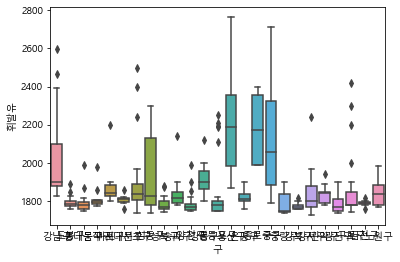

In [47]:
sns.boxplot(x='구', y='휘발유', data=df)

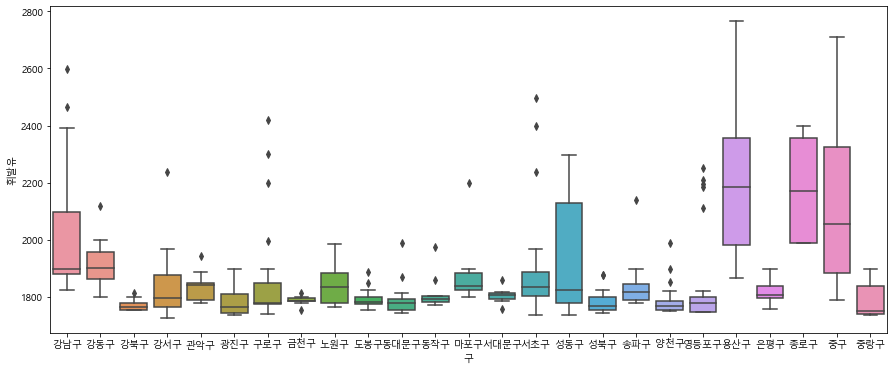

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x='구', y='휘발유', data=df.sort_values('구'))
plt.show()

In [52]:
df.groupby('구').describe()

휘발유                                                                   
     count         mean         std     min      25%     50%      75%     max
구                                                                            
강남구   34.0  2016.617647  205.403080  1825.0  1879.00  1898.0  2096.75  2598.0
강동구   14.0  1915.000000   79.341521  1799.0  1861.50  1900.5  1956.25  2118.0
강북구   12.0  1770.500000   19.575030  1755.0  1755.00  1765.0  1777.00  1814.0
강서구   33.0  1826.333333   99.458429  1727.0  1765.00  1797.0  1876.00  2238.0
관악구   14.0  1830.857143   49.478600  1777.0  1787.50  1843.0  1848.75  1943.0
광진구   14.0  1784.928571   54.084641  1736.0  1745.25  1765.0  1810.50  1898.0
구로구   20.0  1874.600000  197.919814  1739.0  1775.75  1778.5  1848.00  2420.0
금천구   11.0  1788.272727   14.819520  1755.0  1785.00  1787.0  1795.00  1815.0
노원구   15.0  1844.933333   75.948730  1765.0  1779.50  1835.0  1883.50  1985.0
도봉구   16.0  1793.812500   34.347671  1755.0  1775.00  1783.0  1798.00  1887.0
동대문구  18.0  1787.111111   59.232234  1745.0  1755.00  1777.0  1791.75  1990.0
동작구    9.0  1816.777778   64.379301  1773.0  1782.00  1792.0  1804.00  1975.0
마포구   12.0  1873.416667  108.249256  1798.0  1824.50  1839.0  1884.00  2199.0
서대문구  15.0  1804.266667   21.261859  1759.0  1794.00  1807.0  1813.50  1858.0
서초구   30.0  1889.966667  175.252819  1738.0  1803.50  1836.0  1888.75  2495.0
성동구   15.0  1934.800000  205.763456  1736.0  1779.00  1823.0  2128.00  2298.0
성북구   23.0  1782.652174   39.748766  1743.0  1755.00  1767.0  1799.00  1877.0
송파구   30.0  1831.300000   66.708398  1780.0  1790.00  1817.0  1845.50  2138.0
양천구   25.0  1784.360000   54.954436  1749.0  1754.00  1769.0  1784.00  1987.0
영등포구  27.0  1848.185185  168.670374  1747.0  1747.00  1778.0  1799.00  2250.0
용산구   13.0  2199.384615  247.339355  1867.0  1982.00  2186.0  2357.00  2765.0
은평구   16.0  1819.000000   39.687110  1757.0  1797.75  1807.0  1838.00  1898.0
종로구    8.0  2177.000000  201.505051  1989.0  1989.00  2169.5  2355.50  2398.0
중구    10.0  2126.500000  314.098799  1789.0  1883.00  2054.0  2326.25  2711.0
중랑구   13.0  1786.307692   60.814451  1737.0  1739.00  1749.0  1838.00  1898.0

In [53]:
cond1 = df['구'] == '영등포구'
cond2 = df['휘발유'] > 2000
df[cond1 & cond2]

,상호,휘발유,상표,셀프여부,주소,구
264,성원이앤에스(주)영등포지점,2110,GS칼텍스,N,서울 영등포구 국회대로52길 9-13 (영등포동7가),영등포구
265,지에스칼텍스(주) 국회대로주유소,2185,GS칼텍스,N,서울 영등포구 국회대로 746 (여의도동),영등포구
266,KH여의도주유소,2195,SK에너지,N,서울 영등포구 국회대로 794 (여의도동),영등포구
267,SJ오일(주) 여의도주유소,2210,GS칼텍스,N,서울 영등포구 은행로 64,영등포구
268,버드나룻길주유소,2250,SK에너지,N,서울 영등포구 버드나루로 111 (당산동),영등포구


In [54]:
df.head()

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구


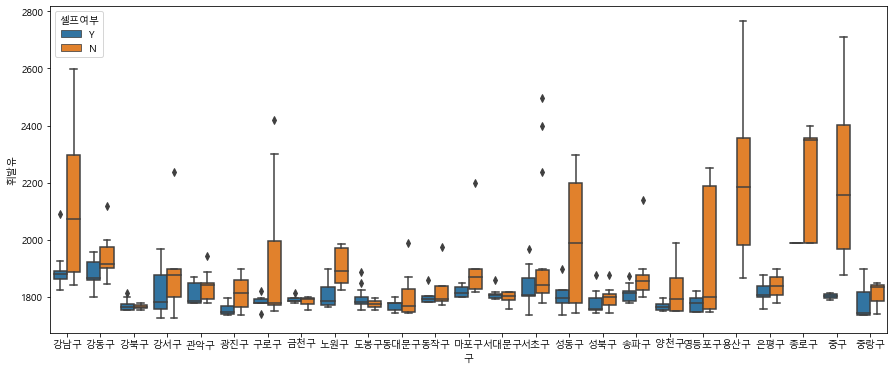

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(x='구', y='휘발유', data=df.sort_values('구'), hue='셀프여부')
plt.show()

In [56]:
df[df['구'] == '도봉구']

,상호,휘발유,상표,셀프여부,주소,구
34,(주)자연에너지 햇살주유소,1755,현대오일뱅크,Y,서울 도봉구 방학로 142 (방학동),도봉구
35,도봉제일주유소(주)송만에너지,1755,현대오일뱅크,N,서울 도봉구 도봉로 783 (도봉동),도봉구
36,삼미북부셀프주유소,1775,SK에너지,Y,서울 도봉구 도봉로 437 (쌍문동),도봉구
37,극동유화(주) 대안주유소,1775,S-OIL,Y,서울 도봉구 마들로 574 (창동),도봉구
38,대성산업(주)신창주유소,1775,GS칼텍스,Y,서울 도봉구 덕릉로 267 (창동),도봉구
39,한이에너지(주) 쌍문주유소,1775,S-OIL,Y,서울 도봉구 도봉로 547 (쌍문동),도봉구
40,(주)헨지스에너지 구도일주유소 도봉,1775,S-OIL,Y,서울 도봉구 도봉로 706 (방학동),도봉구
41,현대오일뱅크㈜직영 도봉현대셀프주유소,1779,현대오일뱅크,Y,서울 도봉구 도봉로 941 (도봉동),도봉구
42,동일석유(주) 창동주유소,1787,SK에너지,Y,서울 도봉구 도봉로 434 (창동),도봉구
43,현대오일뱅크㈜직영 영신주유소,1797,현대오일뱅크,N,서울 도봉구 방학로 151,도봉구


In [60]:
df[df['구'] == '도봉구']['셀프여부'].value_counts()

Y    14
N     2
Name: 셀프여부, dtype: int64

In [61]:
df[df['구'] == '강북구']['셀프여부'].value_counts()

Y    10
N     2
Name: 셀프여부, dtype: int64

In [62]:
df[df['구'] == '관악구']['셀프여부'].value_counts()

N    9
Y    5
Name: 셀프여부, dtype: int64

In [63]:
df.head()

,상호,휘발유,상표,셀프여부,주소,구
0,현대오일뱅크 도곡셀프주유소,1825,현대오일뱅크,Y,서울 강남구 남부순환로 2718 (도곡2동),강남구
1,(주)보성 세곡주유소,1835,SK에너지,Y,서울 강남구 헌릉로 731 (세곡동),강남구
2,현대오일뱅크(주) 유진주유소,1840,현대오일뱅크,N,서울 강남구 논현로 152 (도곡동),강남구
3,오일프러스 셀프,1850,SK에너지,Y,서울 강남구 남부순환로 2651 (도곡동),강남구
4,에쓰-오일㈜직영 개나리주유소,1859,S-OIL,N,서울 강남구 언주로 423 (역삼동),강남구


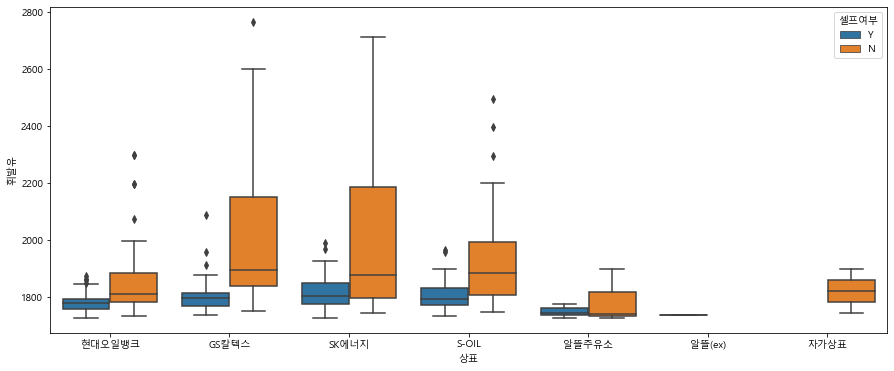

In [64]:
plt.figure(figsize=(15,6))
sns.boxplot(x='상표', y='휘발유', data=df.sort_values('구'), hue='셀프여부')
plt.show()

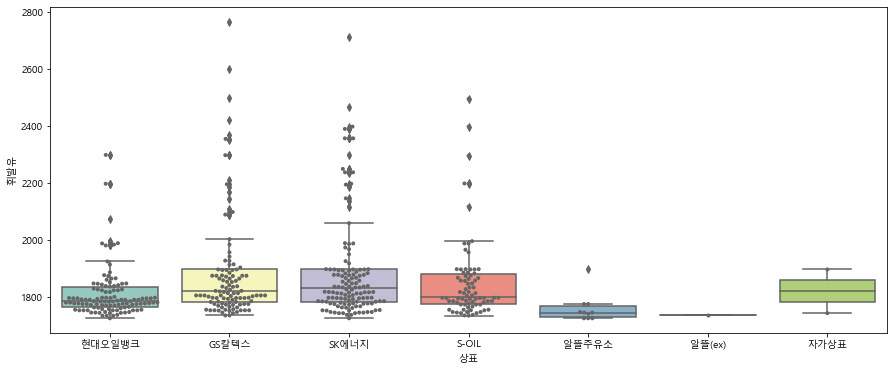

In [72]:
plt.figure(figsize=(15,6))
sns.boxplot(x='상표', y='휘발유', data=df.sort_values('구'), palette='Set3')
sns.swarmplot(x='상표', y='휘발유', data=df.sort_values('구'), size=4, color='.4')
plt.show()

In [73]:
import json
import folium
import ggcode

In [74]:
df.sort_values(by='휘발유', ascending=False).head(10)

,상호,휘발유,상표,셀프여부,주소,구
282,서계주유소,2765,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구
318,서남주유소,2711,SK에너지,N,서울 중구 통일로 30,중구
33,(주)만정에너지 삼보주유소,2598,GS칼텍스,N,서울 강남구 봉은사로 433 (삼성동),강남구
317,필동주유소,2499,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
133,양재최고주유소,2495,S-OIL,N,서울 서초구 매헌로 72 (양재동),서초구
32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구
427,구로주유소,2420,GS칼텍스,N,서울 구로구 구로동로 137 (구로동),구로구
132,(주)선문에너지 중앙주유소,2398,S-OIL,N,서울특별시 서초구 바우뫼로 219 (양재1동),서초구
307,SK북악주유소,2398,SK에너지,N,서울 종로구 평창문화로 137,종로구
31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구


In [75]:
df.sort_values(by='휘발유', ascending=True).head(10)

,상호,휘발유,상표,셀프여부,주소,구
346,화곡역주유소,1727,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구
345,이케이에너지(주) 강서주유소,1727,현대오일뱅크,Y,서울 강서구 화곡로 273 (화곡동),강서구
347,뉴신정주유소,1727,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구
349,강서오곡셀프주유소,1727,SK에너지,Y,서울 강서구 벌말로 254 (오곡동),강서구
348,목화주유소,1727,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구
135,(주)서울에너지 직영,1736,S-OIL,Y,서울 성동구 천호대로 324 (용답동),성동구
392,태양주유소,1736,현대오일뱅크,N,서울 광진구 동일로 345 (중곡동),광진구
393,(주)창원CW,1736,현대오일뱅크,Y,서울 광진구 광나루로 460 (화양동),광진구
394,현대오일뱅크(주)직영 능동주유소,1736,현대오일뱅크,Y,서울 광진구 천호대로 584 (능동),광진구
320,우림주유소,1737,GS칼텍스,Y,서울특별시 중랑구 용마산로 487 (망우제3동),중랑구


In [95]:
gu_data = df.groupby('구')['휘발유'].mean().astype('int')
gu_data

구
강남구     2016
강동구     1915
강북구     1770
강서구     1826
관악구     1830
광진구     1784
구로구     1874
금천구     1788
노원구     1844
도봉구     1793
동대문구    1787
동작구     1816
마포구     1873
서대문구    1804
서초구     1889
성동구     1934
성북구     1782
송파구     1831
양천구     1784
영등포구    1848
용산구     2199
은평구     1819
종로구     2177
중구      2126
중랑구     1786
Name: 휘발유, dtype: int32

In [96]:
gu_data.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구')

In [97]:
gu_data['강남구']

2016

In [99]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502,126.982], zoom_start=10.5)

map.choropleth(geo_data = geo_data,
              data = gu_data,
              columns = [gu_data.index, gu_data],
              fill_color = 'PuRd',
              key_on = 'feature.id')

map

In [101]:
gu_data.sort_values(ascending=False)

구
용산구     2199
종로구     2177
중구      2126
강남구     2016
성동구     1934
강동구     1915
서초구     1889
구로구     1874
마포구     1873
영등포구    1848
노원구     1844
송파구     1831
관악구     1830
강서구     1826
은평구     1819
동작구     1816
서대문구    1804
도봉구     1793
금천구     1788
동대문구    1787
중랑구     1786
광진구     1784
양천구     1784
성북구     1782
강북구     1770
Name: 휘발유, dtype: int32

In [109]:
top10 = df.sort_values('휘발유', ascending=False).head(10)
bottom10 =  df.sort_values('휘발유', ascending=True).head(10)

In [110]:
top10

,상호,휘발유,상표,셀프여부,주소,구
282,서계주유소,2765,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구
318,서남주유소,2711,SK에너지,N,서울 중구 통일로 30,중구
33,(주)만정에너지 삼보주유소,2598,GS칼텍스,N,서울 강남구 봉은사로 433 (삼성동),강남구
317,필동주유소,2499,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
133,양재최고주유소,2495,S-OIL,N,서울 서초구 매헌로 72 (양재동),서초구
32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구
427,구로주유소,2420,GS칼텍스,N,서울 구로구 구로동로 137 (구로동),구로구
132,(주)선문에너지 중앙주유소,2398,S-OIL,N,서울특별시 서초구 바우뫼로 219 (양재1동),서초구
307,SK북악주유소,2398,SK에너지,N,서울 종로구 평창문화로 137,종로구
31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구


In [111]:
bottom10

,상호,휘발유,상표,셀프여부,주소,구
346,화곡역주유소,1727,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구
345,이케이에너지(주) 강서주유소,1727,현대오일뱅크,Y,서울 강서구 화곡로 273 (화곡동),강서구
347,뉴신정주유소,1727,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구
349,강서오곡셀프주유소,1727,SK에너지,Y,서울 강서구 벌말로 254 (오곡동),강서구
348,목화주유소,1727,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구
135,(주)서울에너지 직영,1736,S-OIL,Y,서울 성동구 천호대로 324 (용답동),성동구
392,태양주유소,1736,현대오일뱅크,N,서울 광진구 동일로 345 (중곡동),광진구
393,(주)창원CW,1736,현대오일뱅크,Y,서울 광진구 광나루로 460 (화양동),광진구
394,현대오일뱅크(주)직영 능동주유소,1736,현대오일뱅크,Y,서울 광진구 천호대로 584 (능동),광진구
320,우림주유소,1737,GS칼텍스,Y,서울특별시 중랑구 용마산로 487 (망우제3동),중랑구


In [121]:
lat = []
lng = []
for i in top10['주소']:
    # print(i)
    lat.append(ggcode.get_lat(i))
    lng.append(ggcode.get_lng(i))

In [116]:
lat

[37.5522895,
 37.5583477,
 37.51151340000001,
 37.5598189,
 37.4670964,
 37.5266815,
 37.490737,
 37.4815383,
 37.5729503,
 37.5184942]

In [122]:
top10['lat'] = lat
top10['lng'] = lng

In [123]:
top10

,상호,휘발유,상표,셀프여부,주소,구,lat,lng
282,서계주유소,2765,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구,37.552290,126.968935
318,서남주유소,2711,SK에너지,N,서울 중구 통일로 30,중구,37.558348,126.972090
33,(주)만정에너지 삼보주유소,2598,GS칼텍스,N,서울 강남구 봉은사로 433 (삼성동),강남구,37.511513,127.047093
317,필동주유소,2499,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구,37.559819,126.994611
133,양재최고주유소,2495,S-OIL,N,서울 서초구 매헌로 72 (양재동),서초구,37.467096,127.034705
32,갤러리아주유소,2466,SK에너지,N,서울 강남구 압구정로 426,강남구,37.526682,127.043515
427,구로주유소,2420,GS칼텍스,N,서울 구로구 구로동로 137 (구로동),구로구,37.490737,126.883519
132,(주)선문에너지 중앙주유소,2398,S-OIL,N,서울특별시 서초구 바우뫼로 219 (양재1동),서초구,37.481538,127.042213
307,SK북악주유소,2398,SK에너지,N,서울 종로구 평창문화로 137,종로구,37.572950,126.979358
31,SK논현주유소,2390,SK에너지,N,서울 강남구 논현로 747 (논현동),강남구,37.518494,127.028232


In [124]:
lat = []
lng = []
for i in bottom10['주소']:
    # print(i)
    lat.append(ggcode.get_lat(i))
    lng.append(ggcode.get_lng(i))
    
bottom10['lat'] = lat
bottom10['lng'] = lng

In [125]:
bottom10

,상호,휘발유,상표,셀프여부,주소,구,lat,lng
346,화곡역주유소,1727,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구,37.540657,126.841506
345,이케이에너지(주) 강서주유소,1727,현대오일뱅크,Y,서울 강서구 화곡로 273 (화곡동),강서구,37.549238,126.846952
347,뉴신정주유소,1727,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구,37.531554,126.856024
349,강서오곡셀프주유소,1727,SK에너지,Y,서울 강서구 벌말로 254 (오곡동),강서구,37.555284,126.768567
348,목화주유소,1727,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구,37.530006,126.862915
135,(주)서울에너지 직영,1736,S-OIL,Y,서울 성동구 천호대로 324 (용답동),성동구,37.564195,127.055579
392,태양주유소,1736,현대오일뱅크,N,서울 광진구 동일로 345 (중곡동),광진구,37.562620,127.085367
393,(주)창원CW,1736,현대오일뱅크,Y,서울 광진구 광나루로 460 (화양동),광진구,37.545055,127.080361
394,현대오일뱅크(주)직영 능동주유소,1736,현대오일뱅크,Y,서울 광진구 천호대로 584 (능동),광진구,37.555573,127.082356
320,우림주유소,1737,GS칼텍스,Y,서울특별시 중랑구 용마산로 487 (망우제3동),중랑구,37.600172,127.099445


In [126]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502,126.982], zoom_start=10.5)

for i in top10.index:
    folium.CircleMarker([top10['lat'][i], top10['lng'][i]],
                       radius=15,
                       color='#CD3181',
                       fill_color='#CD3181').add_to(map)
    
for i in bottom10.index:
    folium.CircleMarker([bottom10['lat'][i], bottom10['lng'][i]],
                       radius=15,
                       color='#3186cc',
                       fill_color='#3186cc').add_to(map)

map